In [48]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
import math

# !!! Determinism !!!
np.random.seed(42)

file_list = [("BLS12", "./bls12/one_off_parallel_1000.csv"),
            ("BN", "./bn/one_off_parallel_1000.csv"),
            ("MNT4", "./mnt4/one_off_parallel_1000.csv"),
            ("MNT6", "./mnt6/one_off_parallel_1000.csv"),]


gas_factor = 30

def get_dfs(files):
    results = []
    for file in files:
        (name, path) = file;
        df = pd.read_csv(path)
        keep = df[["modulus_limbs", "group_limbs", "run_microseconds"]].copy()
        keep["gas"] = keep["run_microseconds"].apply(lambda x: math.ceil(x*gas_factor))
        keep.drop("run_microseconds", axis = 1, inplace = True);
        results.append(keep)
        
    return results

In [49]:
dataframes = get_dfs(file_list)

In [50]:
dataframes[0].head()

,modulus_limbs,group_limbs,gas
0,4,1,44550
1,4,1,31590
2,4,1,32910
3,10,9,212790
4,4,1,31530


In [51]:
dataframes[1].head()

,modulus_limbs,group_limbs,gas
0,4,1,33930
1,4,1,36270
2,4,1,32550
3,4,1,31530
4,4,1,33600


In [52]:
import matplotlib.pyplot as plt

def plot_distr(df):
    for k, g in df.groupby(['modulus_limbs']):
        plt.figure()
        plt.plot(g["group_limbs"], g["gas"], '*')

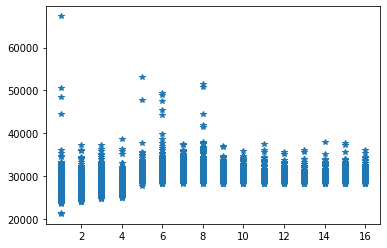

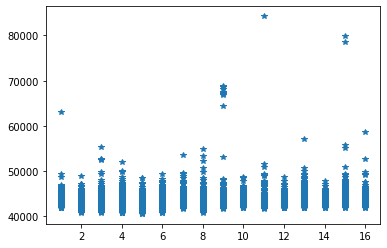

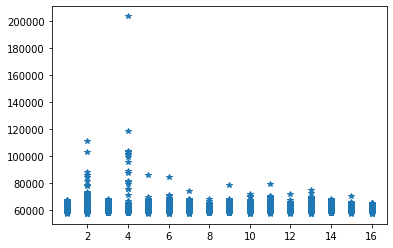

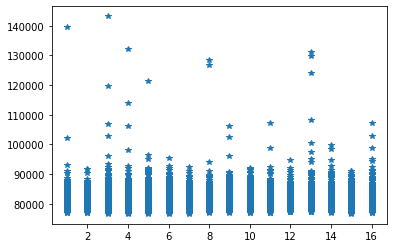

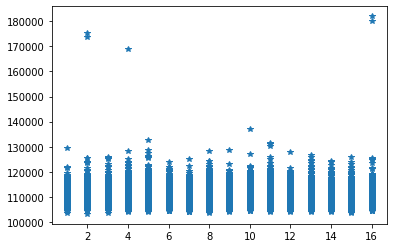

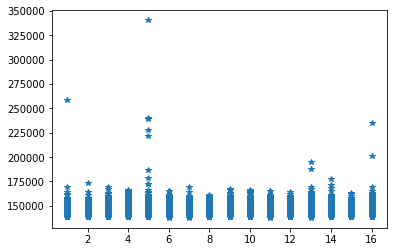

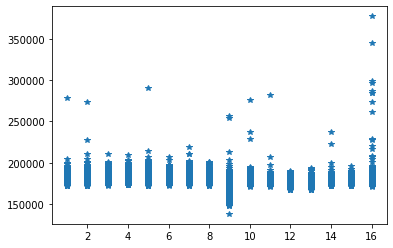

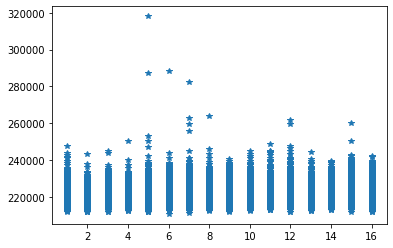

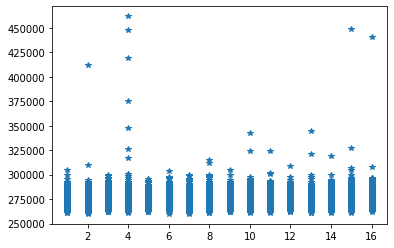

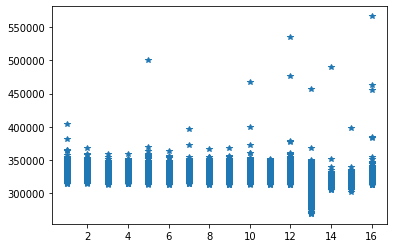

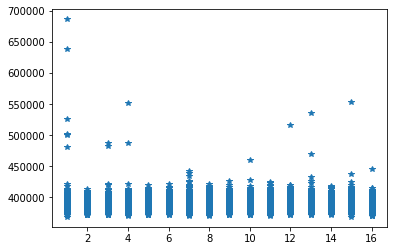

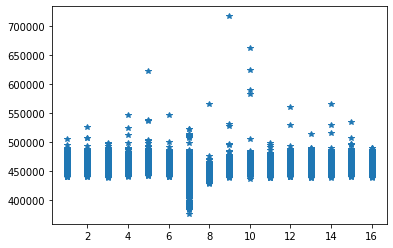

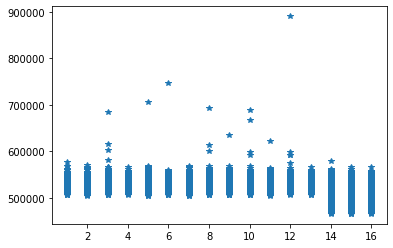

In [53]:
plot_distr(dataframes[0])

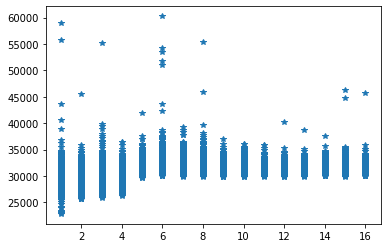

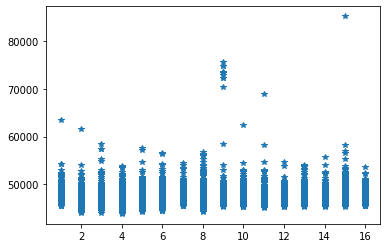

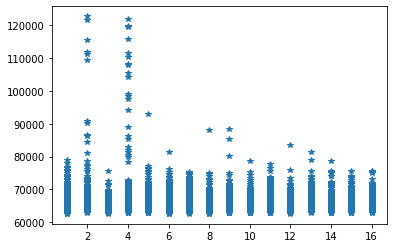

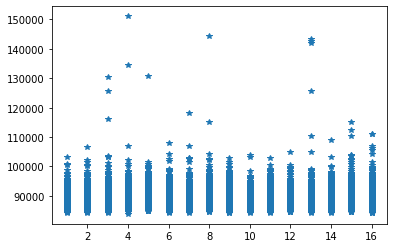

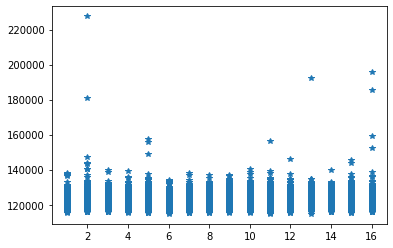

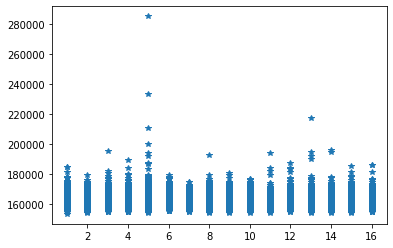

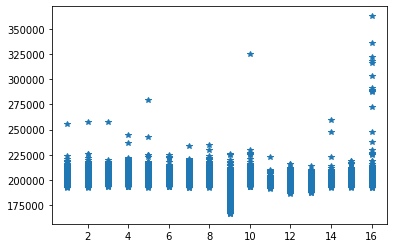

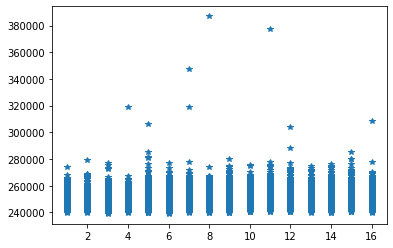

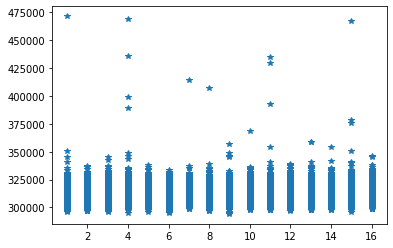

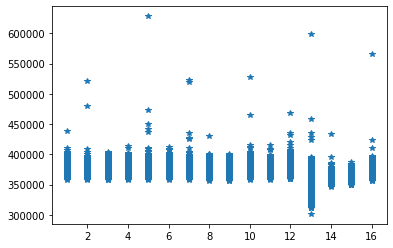

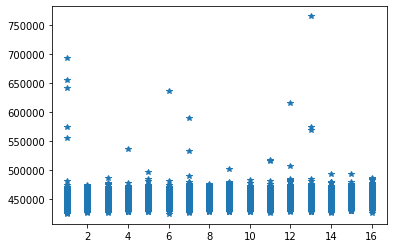

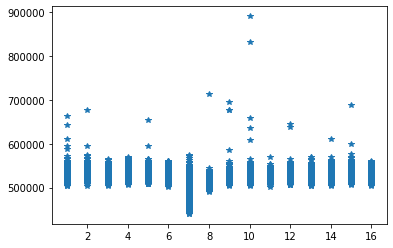

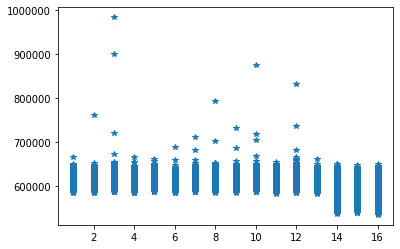

In [54]:
plot_distr(dataframes[1])

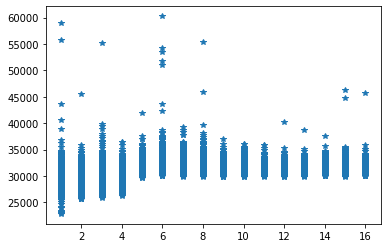

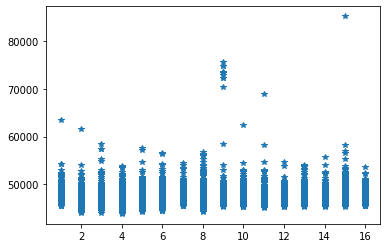

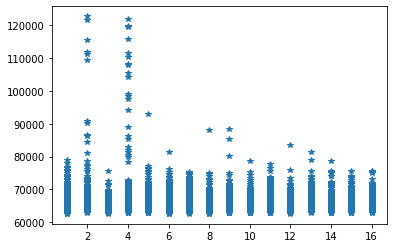

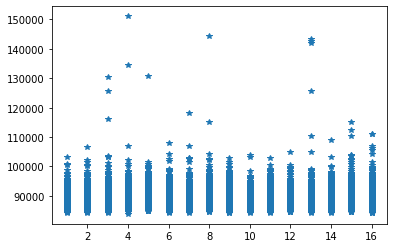

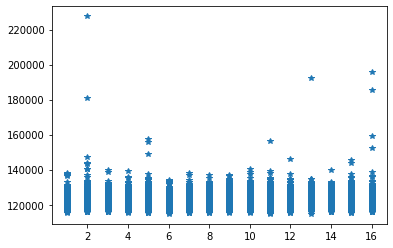

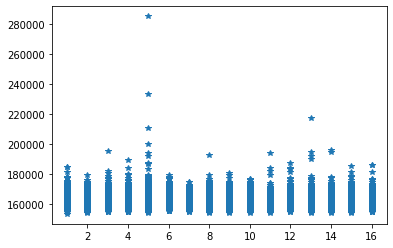

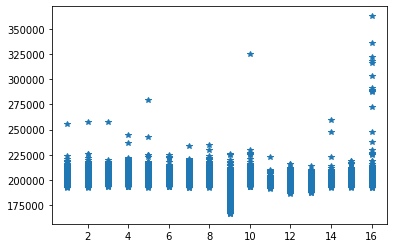

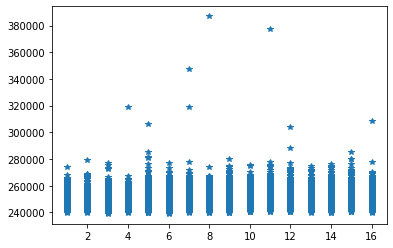

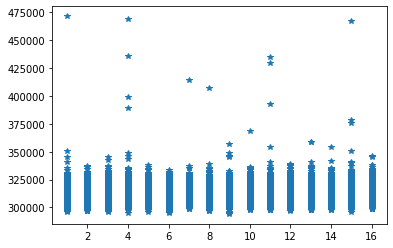

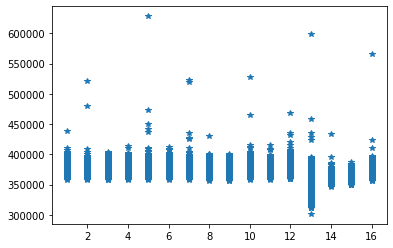

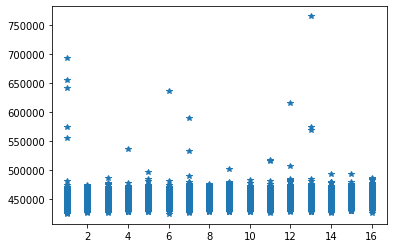

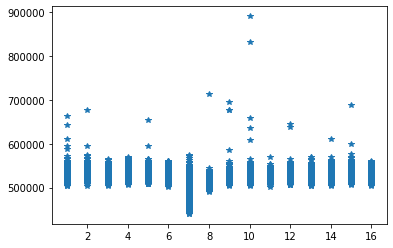

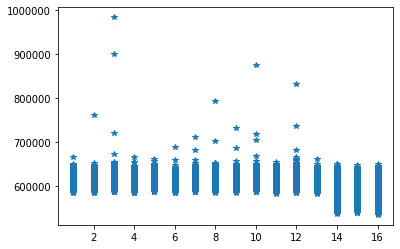

In [55]:
plot_distr(dataframes[2])

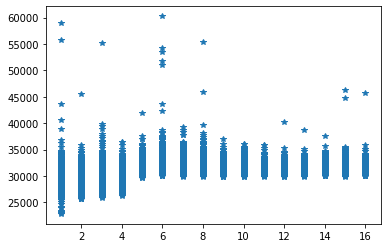

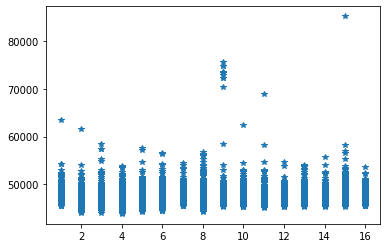

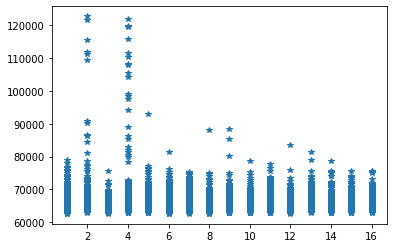

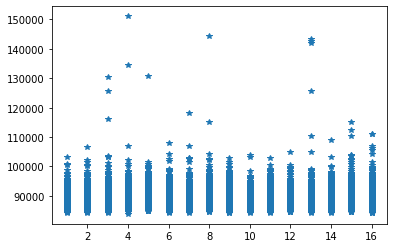

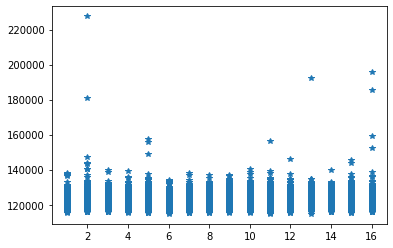

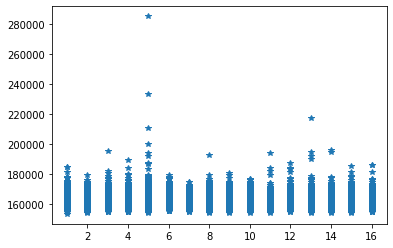

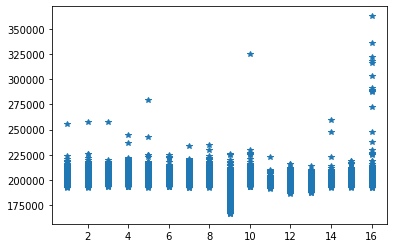

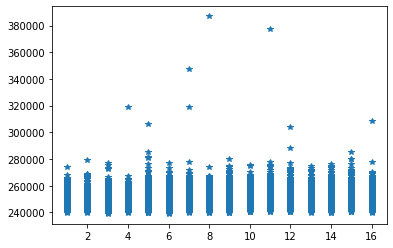

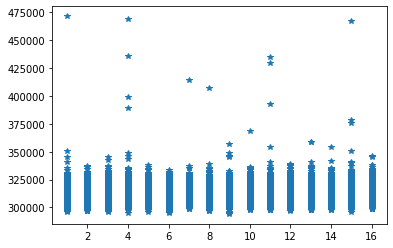

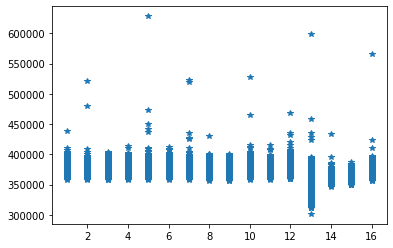

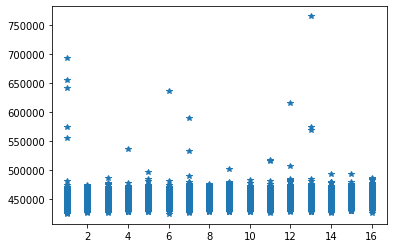

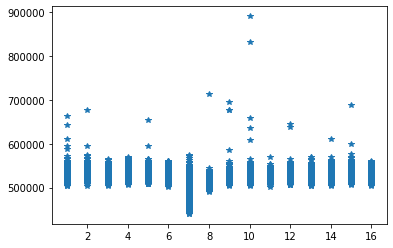

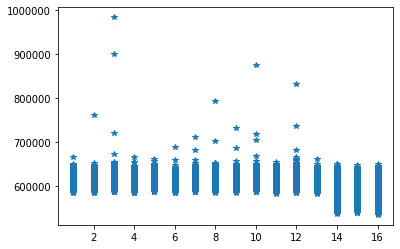

In [56]:
plot_distr(dataframes[3])